In [22]:
import os
import torch
from PIL import Image
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import numpy as np
from skimage import io, transform
import matplotlib.pyplot as plt

plt.ion()

In [9]:
train_folder_path = './FERPlus/data/FER2013Train'
test_folder_path = './FERPlus/data/FER2013Test'
public_test_folder_path = '/FERPlus/data/FER2013Valid'

In [19]:
class FERPlusDataset(Dataset):
    """FERPlus dataset."""
    
    def __init__(self, csv_file, root_dir, transform=None):
        """
        Arguments:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.img_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.img_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.img_frame.iloc[idx, 0])
        image = io.imread(img_name, as_gray=False)
        #dimensions = self.img_frameiloc[n, 1]
        emotions = self.img_frame.iloc[idx, 2:]
        emotions = np.asarray(emotions)
        emotions = emotions.astype('int')
        sample = {'image': image, 'emotions': emotions}

        if self.transform:
            sample = self.transform(sample)

        return sample
    
    
class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, emotions = sample['image'], sample['emotions']
        transform = transforms.ToTensor()
        # swap color axis because
        # numpy image: H x W x C
        # torch image: C x H x W
        #image = image.transpose(1,0)
        return {'image': transform(image),
                'emotions': emotions}

{'image': tensor([[[0.5922, 0.5882, 0.5765,  ..., 0.5059, 0.5490, 0.4706],
         [0.5922, 0.5843, 0.5843,  ..., 0.4784, 0.5529, 0.5373],
         [0.5922, 0.5922, 0.6118,  ..., 0.4275, 0.4824, 0.5725],
         ...,
         [0.7373, 0.7373, 0.4745,  ..., 0.7255, 0.7255, 0.7294],
         [0.7373, 0.7333, 0.7686,  ..., 0.7294, 0.7137, 0.7333],
         [0.7294, 0.7216, 0.7255,  ..., 0.7569, 0.7176, 0.7216]]]), 'emotions': array([6, 0, 1, 1, 0, 0, 0, 0, 2, 0])}
torch.Size([1, 48, 48])


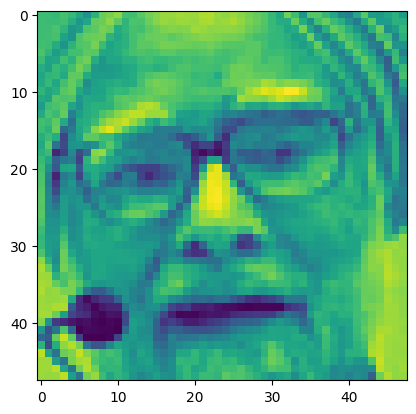

In [26]:
batch_size = 10 #how many units in each insert in the pipeline

face_dataset = FERPlusDataset(os.path.join(train_folder_path,"label.csv"), train_folder_path, transform=ToTensor())

print(face_dataset[0])
print(face_dataset[0]['image'].shape)

np_img = face_dataset[0]['image']
plt.imshow(np.transpose(np_img,(1,2,0)))
trainloader = torch.utils.data.DataLoader(face_dataset, batch_size=batch_size,
                                        shuffle=True, num_workers=0)

In [27]:
for i_batch, sample_batched in enumerate(trainloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['emotions'].size())

    # observe 4th batch and stop.
    if i_batch == 3:
        print(sample_batched)
        break

0 torch.Size([10, 1, 48, 48]) torch.Size([10, 10])
1 torch.Size([10, 1, 48, 48]) torch.Size([10, 10])
2 torch.Size([10, 1, 48, 48]) torch.Size([10, 10])
3 torch.Size([10, 1, 48, 48]) torch.Size([10, 10])
{'image': tensor([[[[0.6078, 0.7098, 0.7529,  ..., 0.4000, 0.7294, 0.9922],
          [0.6431, 0.7176, 0.7451,  ..., 0.3059, 0.7961, 0.9529],
          [0.6431, 0.7137, 0.7451,  ..., 0.1804, 0.7216, 0.9961],
          ...,
          [0.1686, 0.1569, 0.1255,  ..., 0.3020, 0.0863, 0.0784],
          [0.1373, 0.1451, 0.1137,  ..., 0.1922, 0.0588, 0.0941],
          [0.1294, 0.1333, 0.1098,  ..., 0.0980, 0.0824, 0.0863]]],


        [[[0.2745, 0.2824, 0.2157,  ..., 0.2471, 0.2275, 0.2157],
          [0.2824, 0.2706, 0.1922,  ..., 0.2863, 0.2510, 0.2196],
          [0.3059, 0.2314, 0.2118,  ..., 0.3020, 0.2627, 0.2471],
          ...,
          [0.2667, 0.2431, 0.1529,  ..., 0.1176, 0.1137, 0.0941],
          [0.2667, 0.2431, 0.1686,  ..., 0.1255, 0.1216, 0.1294],
          [0.2745, 0.2510,